# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/customer-booking/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, we'll continue exploring the dataset with some visualisations and other metrics that we think may be useful. Then, we shall prepare our dataset for predictive modelling. Finally, we'll be training our machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


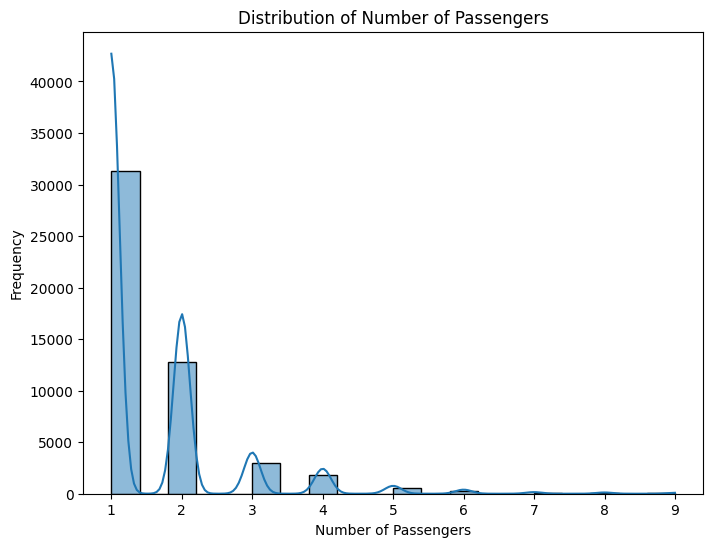

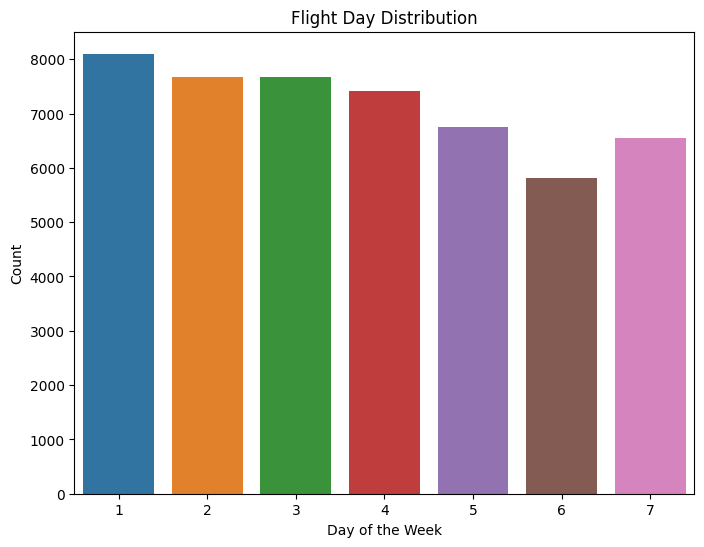

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizations
# Example: Histogram of num_passengers
plt.figure(figsize=(8, 6))
sns.histplot(df["num_passengers"], bins=20, kde=True)
plt.title("Distribution of Number of Passengers")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.show()

# Example: Count plot of flight_day
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="flight_day")
plt.title("Flight Day Distribution")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

### Preparing the dataset

In [9]:
# Handle categorical variables
df = pd.get_dummies(df, columns=["sales_channel", "trip_type", "route", "booking_origin"])

# Split the dataset into features and target variable
X = df.drop(columns=["booking_complete"])
y = df["booking_complete"]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Import models
from sklearn.ensemble import RandomForestClassifier

# Initialize models
rf_model = RandomForestClassifier()


# Train models
rf_model.fit(X_train, y_train)



RandomForestClassifier()

In [11]:
# Import metrics
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy is",rf_accuracy*100,"%")

Random Forest Accuracy is 85.39999999999999 %


In [12]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.14      0.23      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000



  **  Precision:** Precision measures the accuracy of the positive predictions made by the classifier. It is calculated as the ratio of true positive predictions to the total number of positive predictions made by the classifier. In your report:
        Precision for class 0 (label 0): 0.87
        Precision for class 1 (label 1): 0.52

    This means that out of all instances predicted as class 0 by the classifier, 87% of them are actually true positives. Similarly, out of all instances predicted as class 1, 52% are actually true positives.

**    Recall (Sensitivity):** Recall measures the ability of the classifier to correctly identify true positives from all actual positives in the dataset. It is calculated as the ratio of true positive predictions to the total number of actual positive instances. In your report:
        Recall for class 0 (label 0): 0.98
        Recall for class 1 (label 1): 0.14

    This indicates that the classifier has high recall for class 0, correctly identifying 98% of all actual instances of class 0. However, it has low recall for class 1, correctly identifying only 14% of all actual instances of class 1.

**    F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is calculated as 2 * (precision * recall) / (precision + recall). In your report:
        F1-score for class 0 (label 0): 0.92
        F1-score for class 1 (label 1): 0.22

    The F1-score for class 0 is high, indicating a good balance between precision and recall for class 0. However, the F1-score for class 1 is low, indicating that precision and recall are not well-balanced for class 1.

**    Support:** Support refers to the number of actual occurrences of each class in the dataset. In your report:
        Support for class 0 (label 0): 8520
        Support for class 1 (label 1): 1480

    This indicates that there are 8520 instances of class 0 and 1480 instances of class 1 in the dataset.

**    Accuracy: **Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset. In your report:
        Overall accuracy: 0.85 (85%)

    This indicates that the classifier correctly predicts the class label for 85% of all instances in the dataset.

**    Macro Avg and Weighted Avg:** These are averages of precision, recall, and F1-score calculated across all classes. Macro avg treats all classes equally, while weighted avg accounts for class imbalance by computing the average weighted by the number of instances for each class. In your report:
        Macro avg precision, recall, and F1-score are lower compared to weighted avg, indicating class imbalance favoring class 0.

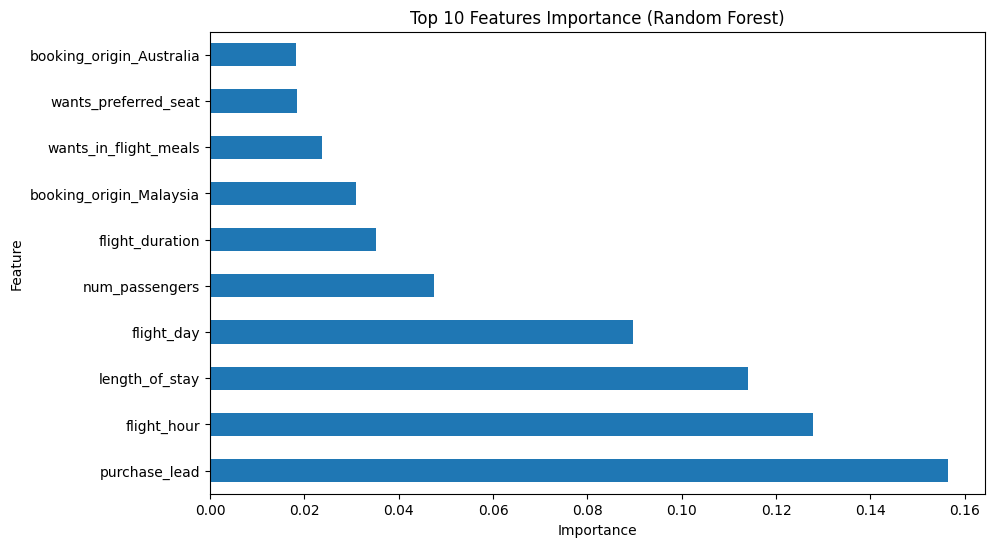

In [13]:
# Feature importance plot for Random Forest
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
